In [ ]:
!pip install cvxopt

# ***Primjer 1***

Optimalne vrijednosti za x su: [4.13844563e-10 1.00000000e+00 3.42635030e-10 7.20671908e-11
 1.00000000e+00 1.00000000e+00]
Vrijednost funkcije cilja J je: 12.70000000033815


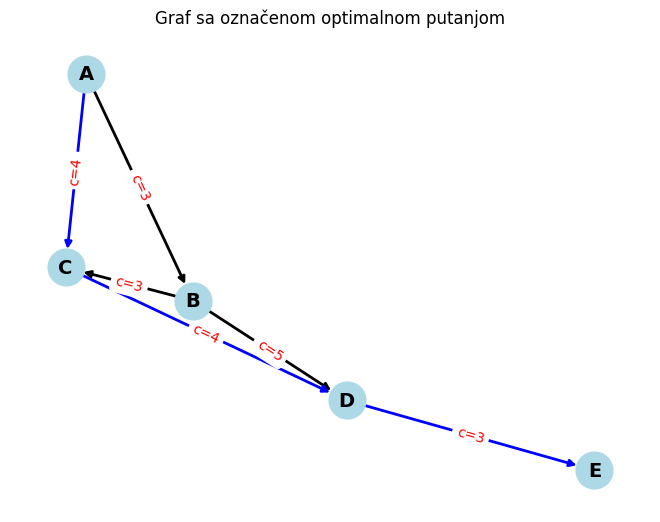

In [ ]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Broj grana
num_edges = 6

# Linearni dio funkcije kriterija - troškovi prijelaza
# AB, AC, BC, BD, CD, DE
c = np.array([3, 4, 3, 5, 4, 3])

# Kvadratni dio funkcije kriterija - troškovi interakcije između prijelaza
# Q mora biti pozitivno semidefinitna matrica

Q = np.array([
    [1, 0, 0, 0.5, 0, 0],
    [0, 1, 0, 0, 0.1, 0],
    [0, 0, 1, 0, 0.5, 0],
    [0.5, 0, 0, 1, 0, 0],
    [0, 0.1, 0.5, 0, 1, 0.1],
    [0, 0, 0, 0, 0.1, 1]
])

# Definisanje varijabli kao binarnih
x = cp.Variable(num_edges, boolean=True)

# Definisanje funkcije cilja
objective = cp.Minimize(c @ x + 0.5 * cp.quad_form(x, Q))

# Definisanje ograničenja
E = np.array([
    [1, 1, 0, 0, 0, 0],  # Početni čvor A
    [0, 0, 0, 0, 0, 1],  # Krajnji čvor E
    [1, 0, -1, -1, 0, 0],  # Čvor B
    [0, 1, 1, 0, -1, 0],  # Čvor C
    [0, 0, 0, 1, 1, -1]  # Čvor D
])

d = np.array([1, 1, 0, 0, 0])

constraints = [E @ x == d]

# Formulacija problema
problem = cp.Problem(objective, constraints)

# Rješavanje problema korištenjem solvera ECOS_BB
problem.solve(solver=cp.ECOS_BB)

# Provjera statusa rješenja
if x.value is None:
    print("Nije pronađeno optimalno rješenje.")
else:
    print("Optimalne vrijednosti za x su:", x.value)

    # Ispis vrijednosti funkcije cilja J
    J = c @ x.value +  0.5 * x.value.T @ Q @ x.value
    print("Vrijednost funkcije cilja J je:", J)

    # Crtanje grafa
    edges = ['AB', 'AC', 'BC', 'BD', 'CD', 'DE']
    optimal_path = x.value > 0.5

    G = nx.DiGraph()
    edges_list = [
        ('A', 'B'),
        ('A', 'C'),
        ('B', 'C'),
        ('B', 'D'),
        ('C', 'D'),
        ('D', 'E')
    ]

    for i in range(num_edges):
        G.add_edge(edges_list[i][0], edges_list[i][1], color='blue' if optimal_path[i] else 'black')

    pos = nx.spring_layout(G)
    colors = [G[u][v]['color'] for u, v in G.edges()]
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=14, font_weight='bold', edge_color=colors, width=2)
    edge_labels = {edges_list[i]: f'c={c[i]}' for i in range(num_edges)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title('Graf sa označenom optimalnom putanjom')
    plt.show()

# ***Primjer 2***

Optimalne vrijednosti za x su: [ 8.28196161e-12  1.00000000e+00  9.02231717e-12  7.45134909e-12
 -1.01293836e-12  3.02248694e-12  1.00000000e+00  8.94880054e-12
  3.43012714e-12  7.69771793e-12  1.00000000e+00  4.63174113e-12]
Vrijednost funkcije cilje J je: 20.499999999867747


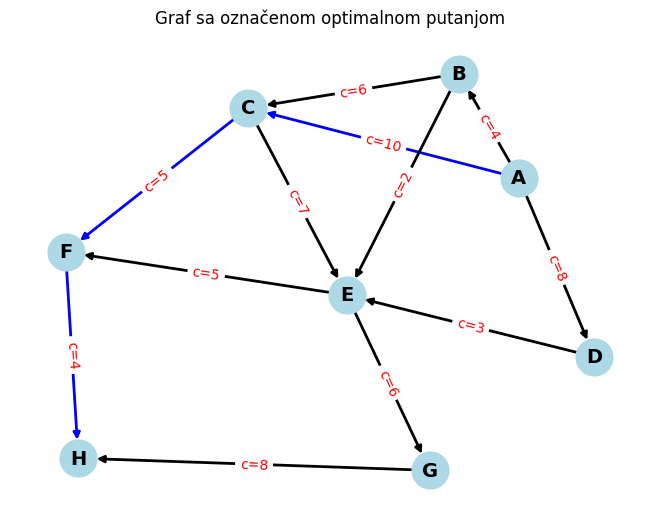

In [ ]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Broj grana
num_edges = 12

# Linearni dio funkcije kriterija - troškovi prijelaza
# AB, AC, AD, BC, BE, CE, CF, DE, EG, EF, FH, GH
c = np.array([4, 10, 8, 6, 2, 7, 5, 3, 6, 5, 4, 8])

# Kvadratni dio funkcije kriterija - troškovi interakcije između prijelaza
# Q mora biti pozitivno semidefinitna matrica
'''
Q = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0.8, 0, 0, 0, 0.5, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0.8, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0.5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.5, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

])'''
Q = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

])
# Definisanje varijabli
x = cp.Variable(num_edges, boolean=True)

# Definisanje funkcije cilja
objective = cp.Minimize(c @ x + 0.5 * cp.quad_form(x, Q))

# Definisanje ograničenja tipa jednakosti
E_eq = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Početni čvor A
    [1, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0],  # Čvor B
    [0, 1, 0, 1, 0, -1, -1, 0, 0, 0, 0, 0],  # Čvor C
    [0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0],  # Čvor D
    [0, 0, 0, 0, 1, 1, 0, 1, -1, -1, 0, 0],  # Čvor E
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, -1, 0],  # Čvor F
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1],  # Čvor G
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]  # Krajnji čvor H

])

d_eq = np.array([1, 0, 0, 0, 0, 0, 0, 1])

# Definisanje ograničenja tipa nejednakosti
G_ineq = np.array([
    [0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]   # Robot mora proći kroz čvor C bar jednom
])

h_ineq = np.array([-1])

constraints = [E_eq @ x == d_eq, G_ineq @ x <= h_ineq]

# Formulacija problema
problem = cp.Problem(objective, constraints)

# Rješavanje problema korištenjem solvera ECOS_BB
problem.solve(solver=cp.ECOS_BB)

# Provjera statusa rješenja
if x.value is None:
    print("Nije pronađeno optimalno rješenje.")
else:
    print("Optimalne vrijednosti za x su:", x.value)

    # Ispis vrijednosti funkcije cilja J
    J = c @ x.value + 0.5 * x.value.T @ Q @ x.value
    print("Vrijednost funkcije cilje J je:", J)

    # Crtanje grafa
    edges = ['AB', 'AC', 'AD', 'BC', 'BE', 'CE', 'CF', 'DE', 'EG', 'EF', 'FH', 'GH']
    optimal_path = x.value > 0.5

    G = nx.DiGraph()
    edges_list = [
        ('A', 'B'),
        ('A', 'C'),
        ('A', 'D'),
        ('B', 'C'),
        ('B', 'E'),
        ('C', 'E'),
        ('C', 'F'),
        ('D', 'E'),
        ('E', 'G'),
        ('E', 'F'),
        ('F', 'H'),
        ('G', 'H')
    ]

    for i in range(num_edges):
        G.add_edge(edges_list[i][0], edges_list[i][1], color='blue' if optimal_path[i] else 'black')

    pos = nx.spring_layout(G)
    colors = [G[u][v]['color'] for u, v in G.edges()]
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=14, font_weight='bold', edge_color=colors, width=2)
    edge_labels = {edges_list[i]: f'c={c[i]}' for i in range(num_edges)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title('Graf sa označenom optimalnom putanjom')
    plt.show()


# ***Primjer 3***

Optimalne vrijednosti za x su: [ 1.00000000e+00 -1.06970088e-11 -1.42272079e-10  1.00000000e+00
  1.42093628e-10  5.63869303e-11 -4.00243257e-11  1.00000000e+00
 -1.80303726e-10  8.40024181e-11  2.16081330e-12 -1.60304021e-10]
Vrijednost funkcije cilja J je: 14.499999999228095


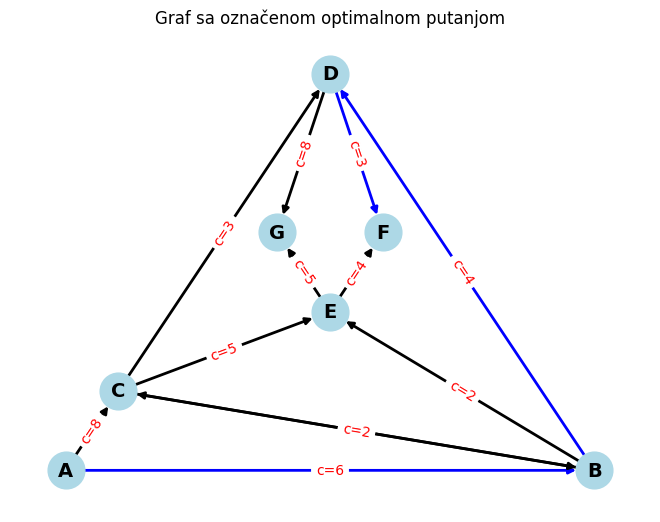

In [ ]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Broj grana
num_edges = 12

# Linearni dio funkcije kriterija - troškovi prijelaza
# AB, AC, BC, BD, BE, CD, CE, DF, DG, EF, EG, CB
c = np.array([6, 8, 2, 4, 2, 3, 5, 3, 8, 4, 5, 2])

# Kvadratni dio funkcije kriterija - troškovi interakcije između prijelaza
# Q mora biti pozitivno semidefinitna matrica

Q = np.array([
    [1, 0, 0, 0, 0.8, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0.8, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0.8, 0, 0, 0, 1, 0, 0, 0, 0, 0.5, 0, 0],
    [0, 0.8, 0, 0, 0, 1, 0, 0, 0.5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.5, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0.5, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
])

# Definisanje varijabli kao binarnih
x = cp.Variable(num_edges, boolean=True)

# Definisanje funkcije cilja
objective = cp.Minimize(c @ x + 0.5 * cp.quad_form(x, Q))

# Definisanje ograničenja
E = np.array([
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Početni čvor A
    [1, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1],  # Čvor B
    [0, 1, 1, 0, 0, -1, -1, 0, 0, 0, 0, -1],  # Čvor C
    [0, 0, 0, 1, 0, 1, 0, -1, -1, 0, 0, 0],  # Čvor D
    [0, 0, 0, 0, 1, 0, 1, 0, 0, -1, -1, 0],  # Čvor E
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]  # Čvorovi F i G
])

d = np.array([1, 0, 0, 0, 0, 1])

constraints = [E @ x == d]

# Formulacija problema
problem = cp.Problem(objective, constraints)

# Rješavanje problema korištenjem solvera ECOS_BB
problem.solve(solver=cp.ECOS_BB)

# Provjera statusa rješenja
if x.value is None:
    print("Nije pronađeno optimalno rješenje.")
else:
    print("Optimalne vrijednosti za x su:", x.value)

    # Ispis vrijednosti funkcije cilja J
    J = c @ x.value +  0.5 * x.value.T @ Q @ x.value
    print("Vrijednost funkcije cilja J je:", J)

    # Crtanje grafa
    edges = ['AB', 'AC', 'BC', 'BD', 'BE', 'CD', 'CE', 'DF', 'DG', 'EF', 'EG', 'CB']
    optimal_path = x.value > 0.5

    G = nx.DiGraph()
    edges_list = [
        ('A', 'B'),
        ('A', 'C'),
        ('B', 'C'),
        ('B', 'D'),
        ('B', 'E'),
        ('C', 'D'),
        ('C', 'E'),
        ('D', 'F'),
        ('D', 'G'),
        ('E', 'F'),
        ('E', 'G'),
        ('C', 'B')
    ]

    for i in range(num_edges):
        G.add_edge(edges_list[i][0], edges_list[i][1], color='blue' if optimal_path[i] else 'black')

    pos = nx.planar_layout(G)
    colors = [G[u][v]['color'] for u, v in G.edges()]
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=14, font_weight='bold', edge_color=colors, width=2)
    edge_labels = {edges_list[i]: f'c={c[i]}' for i in range(num_edges)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title('Graf sa označenom optimalnom putanjom')
    plt.show()